In [41]:
import numpy as np
import pandas as pd
import cv2 
from scipy import special
import matplotlib.pyplot as plt

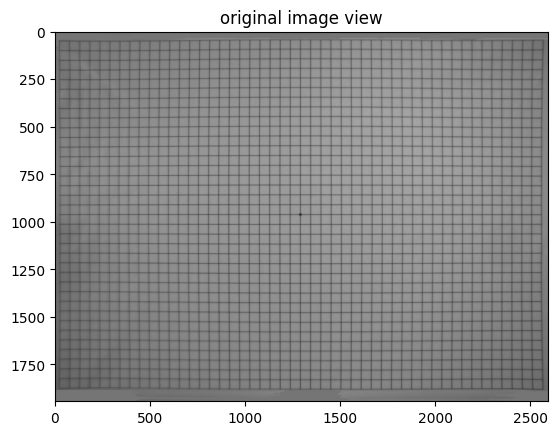

In [42]:
original_image = cv2.imread("hyttest2.png")
original_array = np.array(original_image)
copy_array = original_array.copy()
copy_array = cv2.cvtColor(copy_array , cv2.COLOR_BGR2GRAY)

plt.imshow(original_image)
plt.title("original image view")
plt.show()

In [43]:
def thresholder(original_array):
    gray_image = cv2.cvtColor(original_array , cv2.COLOR_BGR2GRAY)
    gray_image = cv2.medianBlur(gray_image,1)
    
    #plt.imshow(gray_image)
    avarage = gray_image.mean(axis = (0,1))-(gray_image.mean(axis = (0,1))/7.5)
    
    rat1 , threshold_img = cv2.threshold(gray_image , avarage , 255 , cv2.THRESH_BINARY)
    return threshold_img

In [44]:
x_partitions = np.arange(0,2593,162)
y_partitions = np.arange(0,1945,162)
print(f"x_partitions:\n\n{x_partitions}\n\ny_partitions:\n\n{y_partitions}")        

x_partitions:

[   0  162  324  486  648  810  972 1134 1296 1458 1620 1782 1944 2106
 2268 2430 2592]

y_partitions:

[   0  162  324  486  648  810  972 1134 1296 1458 1620 1782 1944]


In [45]:
y = np.array([[0,162],[162,324],[324,486],[486,648],[648,810],[810,972],[972,1134],[1134,1296],[1296,1458],[1458,1620],[1620,1782],[1782,1944],[1944,2106],[2106,2268],[2268,2430],[2430,2592]])
x = np.array([[0,162],[162,324],[324,486],[486,648],[648,810],[810,972],[972,1134],[1134,1296],[1296,1458],[1458,1620],[1620,1782],[1782,1944]])

In [46]:
for i in range(len(x)):
    for j in range(len(y)):
        array = original_array[x[i , 0] : x[i , 1] , y[j , 0] : y[j , 1]]
        copy_array[x[i , 0] : x[i , 1] , y[j , 0] : y[j , 1]] = thresholder(array)

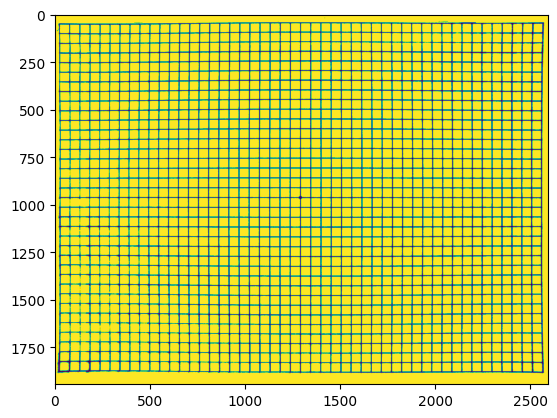

In [47]:
plt.imshow(copy_array)
plt.show()

In [48]:
plt.imsave("BW_image.jpeg" , copy_array)

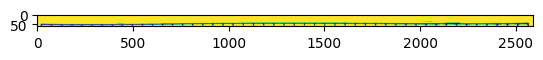

In [49]:
plt.imshow(copy_array[0:60 , 0 : 2592])

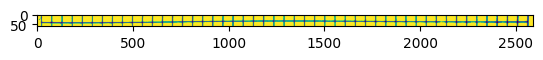

In [50]:
plt.imshow(copy_array[60:120 , 0 : 2592])

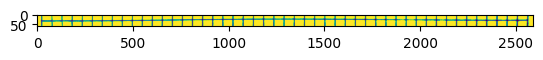

In [51]:
plt.imshow(copy_array[120:180 ,:])

### line fitting

First we need to conver our color black and white

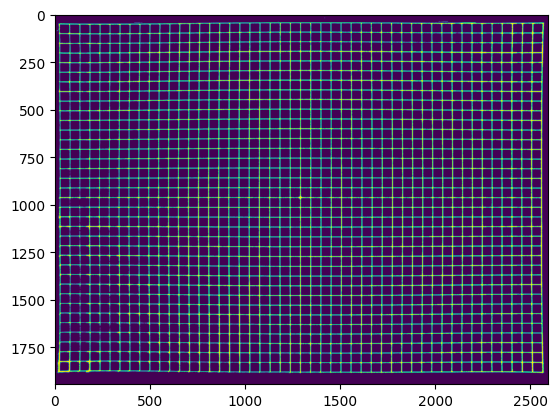

In [52]:
mask = (copy_array > 200)
mask2 = (copy_array < 100)

copy_array[mask]  = 0
copy_array[mask2] = 255

plt.imsave("BW_image.jpeg" , copy_array)

plt.imshow(copy_array)
plt.show()

In [53]:
copy_array[0].shape

(2592,)

In [54]:
x_lines = np.zeros(shape = (1944 , 2592))
y_lines = np.zeros(shape = (1944 , 2592))

In [55]:

for i in range(1944):
    print(f"{i},     {np.count_nonzero(copy_array[i , :])}")
    filter_line = (np.count_nonzero(copy_array[i , :]) > 1000)
    if filter_line == True:  
        second_filter = (copy_array[i , :] > 250)
        x_lines[i , :][second_filter] = 255
    else:
        continue


0,     0
1,     0
2,     0
3,     0
4,     0
5,     0
6,     0
7,     0
8,     0
9,     0
10,     0
11,     0
12,     0
13,     0
14,     0
15,     0
16,     0
17,     0
18,     0
19,     0
20,     3
21,     0
22,     0
23,     0
24,     0
25,     0
26,     0
27,     0
28,     0
29,     0
30,     0
31,     0
32,     0
33,     0
34,     0
35,     0
36,     0
37,     0
38,     41
39,     0
40,     0
41,     0
42,     0
43,     0
44,     661
45,     1045
46,     1583
47,     1816
48,     1510
49,     1293
50,     1215
51,     1138
52,     903
53,     793
54,     676
55,     454
56,     271
57,     246
58,     232
59,     221
60,     217
61,     220
62,     218
63,     215
64,     212
65,     208
66,     213
67,     208
68,     217
69,     210
70,     210
71,     212
72,     212
73,     214
74,     211
75,     208
76,     211
77,     205
78,     206
79,     207
80,     209
81,     209
82,     212
83,     210
84,     208
85,     204
86,     216
87,     217
88,     216
89,     216
90,     22

In [56]:
x_lines

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

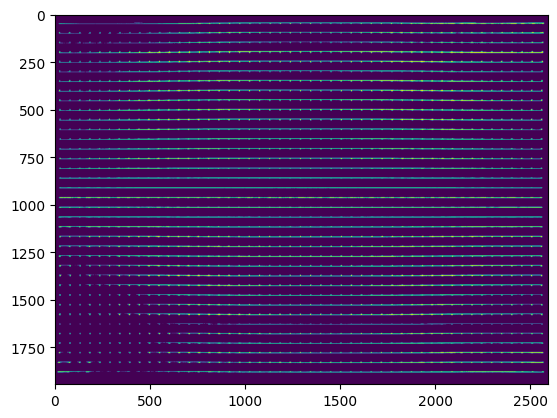

In [57]:
plt.imshow(x_lines)
plt.show()

In [58]:
for i in range(2592):
    print(f"{i},     {np.count_nonzero(copy_array[: , i])}")
    filter_line = (np.count_nonzero(copy_array[: , i]) > 700)
    if filter_line == True:  
        second_filter = (copy_array[: , i] > 200)
        y_lines[: , i][second_filter] = 255
    else:
        continue

0,     0
1,     0
2,     0
3,     0
4,     0
5,     0
6,     0
7,     0
8,     1
9,     0
10,     0
11,     5
12,     7
13,     10
14,     13
15,     30
16,     44
17,     65
18,     81
19,     109
20,     151
21,     244
22,     407
23,     820
24,     1192
25,     1605
26,     1624
27,     1340
28,     1063
29,     363
30,     200
31,     179
32,     168
33,     163
34,     161
35,     166
36,     159
37,     160
38,     159
39,     156
40,     160
41,     159
42,     157
43,     152
44,     152
45,     156
46,     150
47,     152
48,     153
49,     151
50,     149
51,     147
52,     149
53,     151
54,     147
55,     154
56,     145
57,     151
58,     151
59,     154
60,     159
61,     158
62,     157
63,     160
64,     166
65,     170
66,     174
67,     179
68,     182
69,     186
70,     190
71,     200
72,     222
73,     246
74,     292
75,     385
76,     606
77,     1115
78,     1642
79,     1634
80,     1074
81,     345
82,     193
83,     154
84,     151
85,     143
8

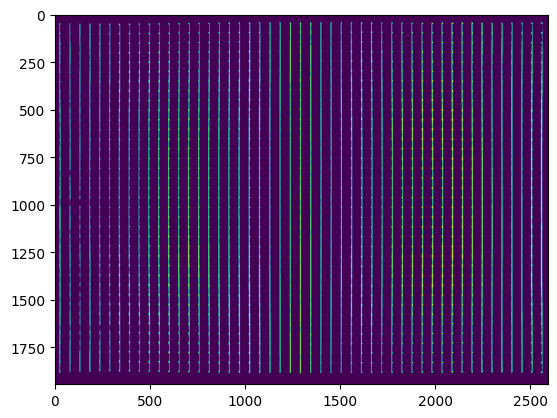

In [59]:
plt.imshow(y_lines)
plt.show()

In [60]:
cv2.imwrite("orthogonal.jpeg" , x_lines)

True

In [61]:
np.max(x_lines/255 + y_lines/255)

2.0

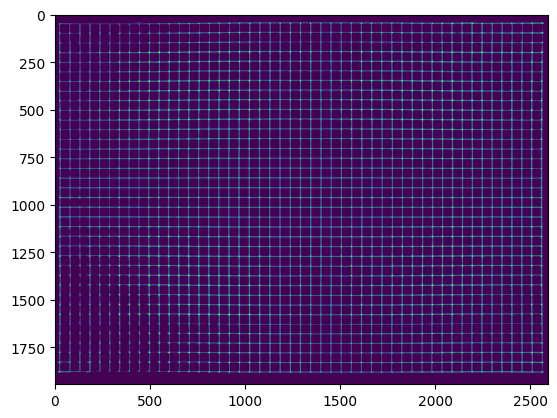

2.0


In [62]:
mesh_arrays = np.array((x_lines/255 + y_lines/255))
plt.imshow(mesh_arrays)
plt.show()
print(np.max(mesh_arrays))

In [63]:
mesh_array_filter = (mesh_arrays > 1)
#filtered_dots = (mesh_arrays[mesh_array_filter])


np.max(mesh_array_filter)
#plt.imshow(filtered_dots)
#plt.show()

True

In [64]:
np.shape(mesh_array_filter)

(1944, 2592)

In [65]:
mesh_arrays[mesh_array_filter] = 255
mesh_arrays[np.invert(mesh_array_filter)] = 0

In [66]:
np.shape(mesh_arrays)

(1944, 2592)

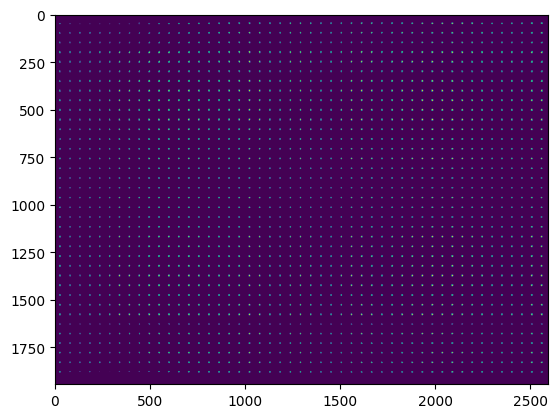

In [67]:
plt.imshow(mesh_arrays)
plt.show()

In [68]:
plt.imsave("mesh_Arrays.jpeg",mesh_arrays)

In [69]:
np.shape(mesh_arrays)

(1944, 2592)

In [70]:
mesh_shape = np.shape(mesh_arrays)
print(mesh_shape)

(1944, 2592)


In [71]:
np.max(mesh_arrays)

255.0

In [72]:
dot_matrix = np.zeros(mesh_shape)

for i in range(mesh_shape[0]):
    for j in range(mesh_shape[1]):
            if mesh_arrays[i,j] == 255:
                a = i
                while mesh_arrays[i,j] == 255:
                    print(mesh_arrays[i,j] == 255)
                    continue
                else:
                    aa = i
                    center_mass = ((aa-a)/2)
                    dot_matrix[center_mass,j] = 255
            


KeyboardInterrupt: 